<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Initiation à la Statistique](https://github.com/wikistat/InitStat)

# Statistiques élémentaires et concentration d'ozone  avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

**Résumé**: 
Initiation à la pratique des techniques élémentaires de statistique par l'étude d'un jeu de données à l'aide du logiciel R. L'objectif est de prévoir la concentration en ozone le lendemain à partir de celle du jour et de mesures météorologiques : [description  élémentaire](http://wikistat.fr/pdf/st-l-descript-estim-intro.pdf), [estimation](http://wikistat.fr/pdf/st-l-inf-estim.pdf), [tests](http://wikistat.fr/pdf/st-l-inf-tests.pdf), [régression linéaire](http://wikistat.fr/pdf/st-l-inf-regsim.pdf), [analyse de variance](http://wikistat.fr/pdf/st-l-inf-tests.pdf) (ANOVA), [analyse en composantes principales](http://wikistat.fr/pdf/st-l-des-multi.pdf), [régression multiple](http://wikistat.fr/pdf/st-l-inf-intRegmult.pdf). Si nécessaire, un [tutoriel](http://wikistat.fr/pdf/st-tutor-start-R-intro.pdf) de démarrage avec R est disponible.

## 1 Introduction
La pollution de l'air constitue actuellement une des préoccupations majeures de santé publique. De nombreuses études épidémiologiques ont permis de mettre en évidence l'influence sur la santé de certains composés chimiques comme le dioxyde souffre (SO2), le dioxyde d'azote (NO2), l'ozone (O3) ou des particules en suspension. Des associations de surveillance de la qualité de l'air (Air Breizh en Bretagne depuis 1994) existent sur tout le territoire métropolitain et mesurent la concentration des polluants. Elles enregistrent également les conditions météorologiques comme la température, la nébulosité, le vent, les chutes de pluie en relation avec les services de Météo France... L'une des missions de ces associations est de construire des modèles de prévision de la concentration en ozone du lendemain à partir des données disponibles du jour : observations et prévisions de Météo France. Plus précisément, il s'agit d'anticiper l'occurrence ou non d'un dépassement légal du pic d'ozone (180 $\mu$gr/m3)  le lendemain afin d'aider les services préfectoraux à prendre les décisions nécessaires de prévention : confinement des personnes à risque, limitation du trafic routier.
Plus modestement, l'objectif de cette étude est de mettre en évidence l'influence de certains paramètres sur la concentration d'ozone (en  $\mu$gr/m3) et différentes variables observées ou leur prévision. 
Les 112 données étudiées ont été recueillies à Rennes durant l'été 2001. Elles sont disponibles sur le site du laboratoire de mathématiques appliquées de l'Agrocampus Ouest. 

Les 13 variables observées sont : 

- 	MaxO3	:		Maximum de concentration d'ozone observé sur la journée en  $\mu$gr/m3
-	T9, T12, T15 :	Température observée à 9, 12 et 15h 
-  	Ne9, Ne12, Ne15	: Nébulosité observée à 9, 12 et 15h
-  	Vx9, Vx12, Vx15	: Composante E-O du vent  à 9, 12 et 15h
-  	MaxO3v	:	Teneur maximum en ozone observée la veille
-  	vent	:		orientation du vent à 12h 
-  	pluie		:	occurrence ou non de précipitations

## 2 Exploration statistique élémentaire
### 2.1 Lire les données
Les données sont disponibles dans un [répertoire](http://wikistat.fr/data) sous la forme d'un fichier [`ozone.csv`](http://wikistat.fr/data/ozone.csv) construit à partir  de Excel  en choisissant ";" comme séparateur et "," comme marque décimale. Télécharger ce fichier (ou le lire directement) dans le répertoire courant de R avant d'exécuter les commandes :

In [1]:
# Data frame à partir d'un fichier csv
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
#path=""
ozone=read.table(paste(path,"ozone.csv",sep=""),sep=";",dec=",",header=T)
# vérification
summary(ozone)
# Supprimer la variable inutile "obs" 
ozone=ozone[,-1]

      obs            maxO3              T9             T12       
 Min.   :601.0   Min.   : 42.00   Min.   :11.30   Min.   :14.00  
 1st Qu.:701.8   1st Qu.: 70.75   1st Qu.:16.20   1st Qu.:18.60  
 Median :729.5   Median : 81.50   Median :17.80   Median :20.55  
 Mean   :763.2   Mean   : 90.30   Mean   :18.36   Mean   :21.53  
 3rd Qu.:829.2   3rd Qu.:106.00   3rd Qu.:19.93   3rd Qu.:23.55  
 Max.   :930.0   Max.   :166.00   Max.   :27.00   Max.   :33.50  
      T15             Ne9             Ne12            Ne15     
 Min.   :14.90   Min.   :0.000   Min.   :0.000   Min.   :0.00  
 1st Qu.:19.27   1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.00  
 Median :22.05   Median :6.000   Median :5.000   Median :5.00  
 Mean   :22.63   Mean   :4.929   Mean   :5.018   Mean   :4.83  
 3rd Qu.:25.40   3rd Qu.:7.000   3rd Qu.:7.000   3rd Qu.:7.00  
 Max.   :35.50   Max.   :8.000   Max.   :8.000   Max.   :8.00  
      Vx9               Vx12             Vx15            maxO3v      
 Min.   :-7.8785   M

### 2.2 [Description unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf)
Décrire chacune des variables en précisant ses caractéristiques :
#### 2.2.1 Variables quantitatives
Décrire chaque variable [(moyenne, écart-type, quantiles, diagramme boîte, histogramme)](http://wikistat.fr/pdf/st-l-des-uni.pdf) afin d'identifier les problèmes potentiels : valeurs atypiques, hétérogénéité des variances, distributions dissymétriques...

In [2]:
summary(ozone)

     maxO3              T9             T12             T15       
 Min.   : 42.00   Min.   :11.30   Min.   :14.00   Min.   :14.90  
 1st Qu.: 70.75   1st Qu.:16.20   1st Qu.:18.60   1st Qu.:19.27  
 Median : 81.50   Median :17.80   Median :20.55   Median :22.05  
 Mean   : 90.30   Mean   :18.36   Mean   :21.53   Mean   :22.63  
 3rd Qu.:106.00   3rd Qu.:19.93   3rd Qu.:23.55   3rd Qu.:25.40  
 Max.   :166.00   Max.   :27.00   Max.   :33.50   Max.   :35.50  
      Ne9             Ne12            Ne15           Vx9         
 Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :-7.8785  
 1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.00   1st Qu.:-3.2765  
 Median :6.000   Median :5.000   Median :5.00   Median :-0.8660  
 Mean   :4.929   Mean   :5.018   Mean   :4.83   Mean   :-1.2143  
 3rd Qu.:7.000   3rd Qu.:7.000   3rd Qu.:7.00   3rd Qu.: 0.6946  
 Max.   :8.000   Max.   :8.000   Max.   :8.00   Max.   : 5.1962  
      Vx12             Vx15            maxO3v          vent      pluie   
 M

In [21]:
sapply(ozone[,-c(12,13)], mean)  # moyennes -> -c(12,13) retire les colonnes 12 et 13 de l'analyse (var qualitatives)

maxO3        T9       T12       T15       Ne9      Ne12      Ne15       Vx9 
90.303571 18.360714 21.526786 22.627679  4.928571  5.017857  4.830357 -1.214346 
     Vx12      Vx15    maxO3v 
-1.611004 -1.690683 90.571429

In [12]:
sapply(ozone[,-c(12,13)], sd)    # écarts-types

maxO3        T9       T12       T15       Ne9      Ne12      Ne15       Vx9 
28.187225  3.122726  4.042321  4.530859  2.594916  2.281860  2.332259  2.632742 
     Vx12      Vx15    maxO3v 
 2.795673  2.810198 28.276853

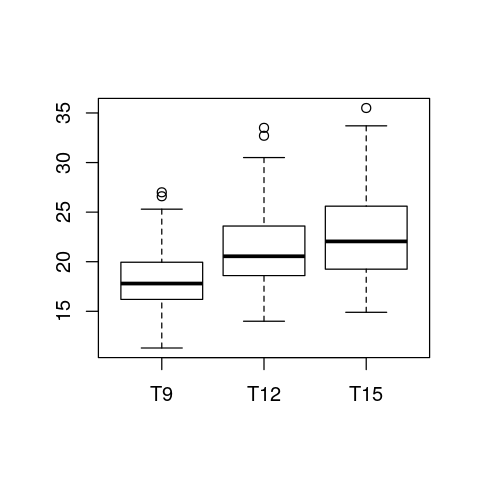

In [6]:
# dimensions des graphiques
options(repr.plot.width=4, repr.plot.height=4)
boxplot(ozone[,2:4]) # boîtes par groupe
#com: la température augmente au cours de la journée

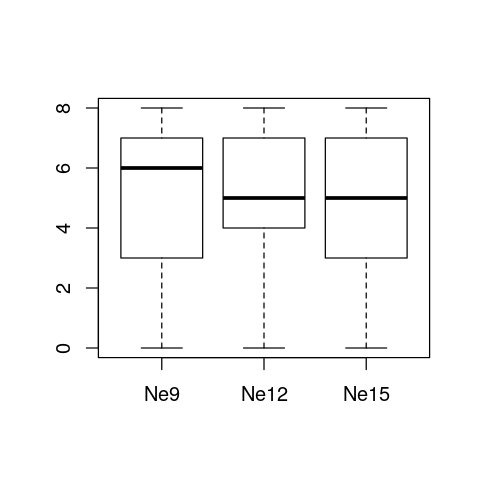

In [7]:
boxplot(ozone[,5:7])
#com: les nuages diminuent au cours de la journée
#présence de valeurs atypiques (ronds)

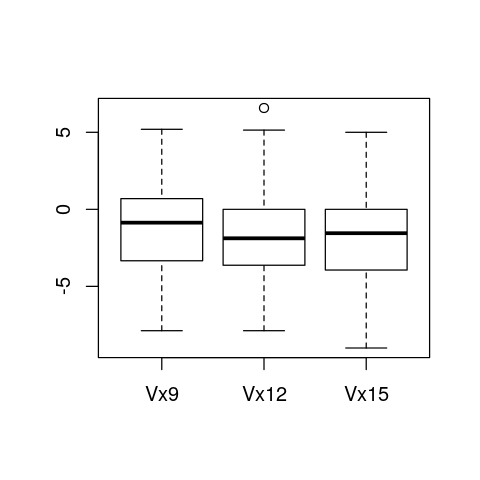

In [8]:
boxplot(ozone[,8:10])
#com: le vent est constant sur la journée
#valeur atypique détectée pour vx12

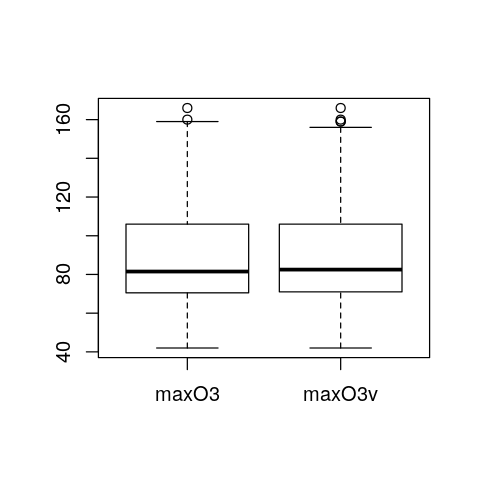

In [9]:
boxplot(ozone[,c(1,11)])
#com: le graphisme ne montrant pas les jours (effectuant une moyenne), les 2 graphes sont logiquement identiques (le jour même est la veille du lendemain ^^)

Commenter les résultats obtenus.

COMMENTAIRE :
*Les variables de concentration d'ozone (maxO3 et maxO3v) ont des valeurs mal réparties, il y a plusieurs valeurs aberrantes ou mal conditionnées en dehors des moustaches du diagramme-boîte utilisé.*


Les deux variables de concentration d'ozone demandent plus d'attention. Il est utile de tester une transformation, souvent le logarithme, pour une variable de concentration.

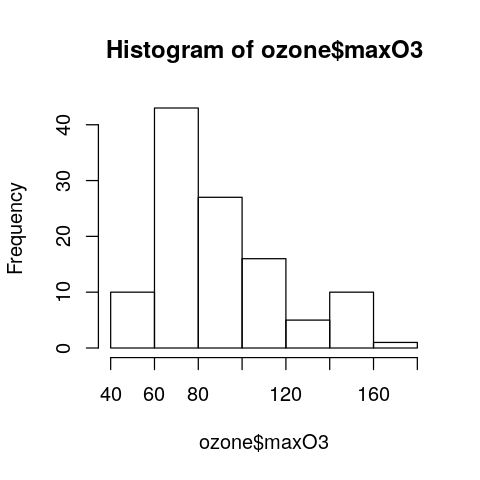

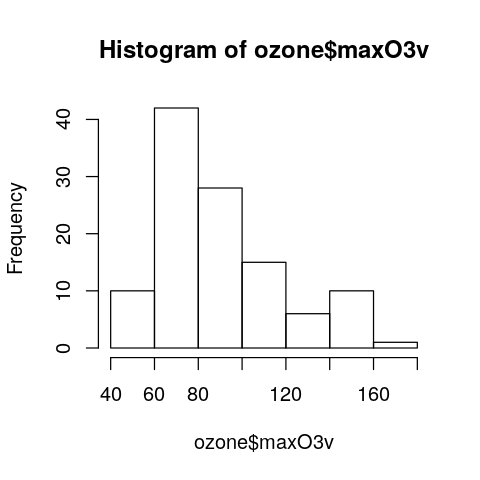

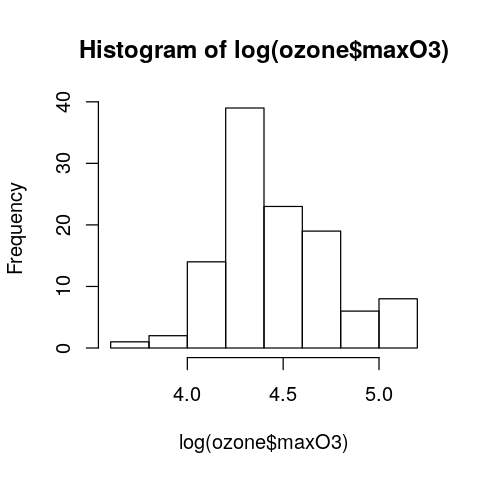

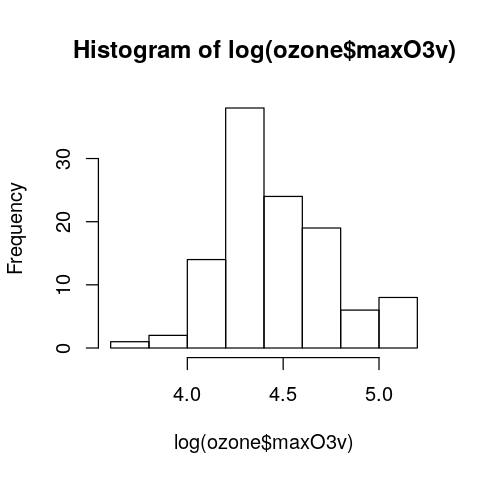

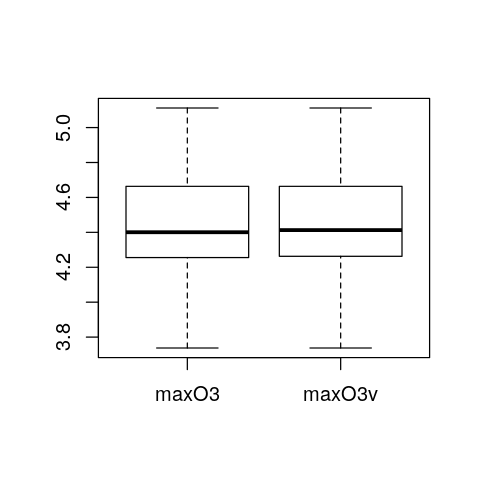

In [23]:
hist(ozone$maxO3)
hist(ozone$maxO3v)
hist(log(ozone$maxO3))
hist(log(ozone$maxO3v))
boxplot(log(ozone[,c(1,11)]))

Les distributions semblent alors plus symétriques et ne présentent plus de valeurs atypiques.

#### 2.2.2 Variables qualitatives
Fréquences des modalités des variables qualitatives.

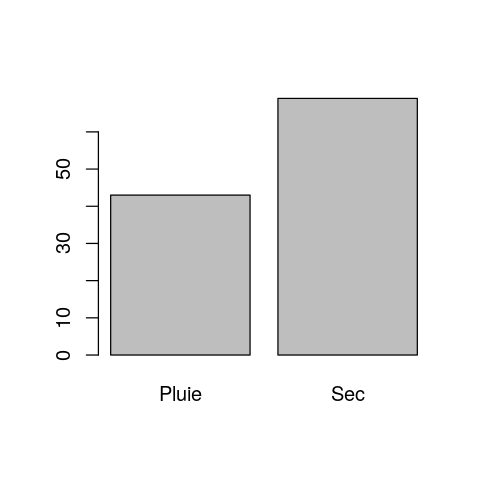

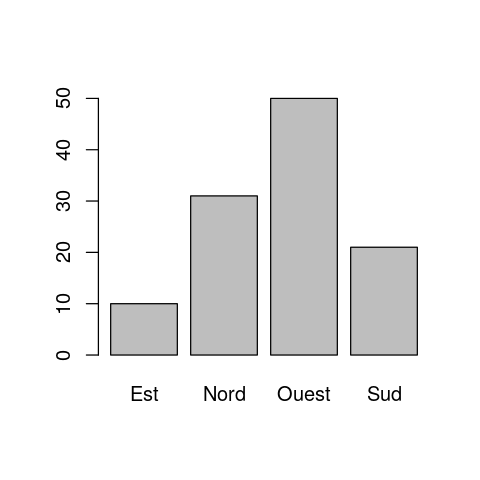

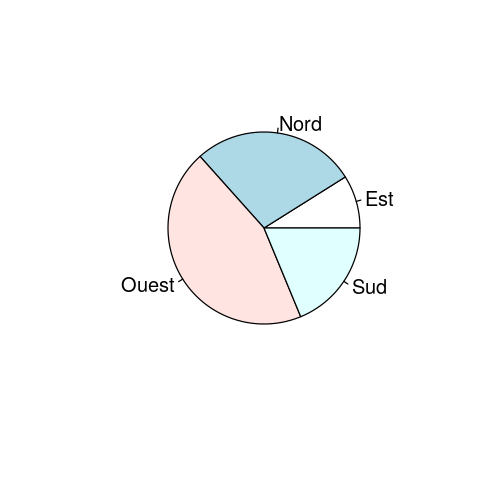

In [24]:
barplot(table(ozone$pluie))
barplot(table(ozone$vent))
pie(table(ozone$vent))

### 2.3 [Description bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf)
#### 2.3.1 Variables quantitatives
Une matrice de [nuages de points](http://wikistat.fr/pdf/st-l-des-bi.pdf) donne un aperçu rapide des structures de corrélation : 

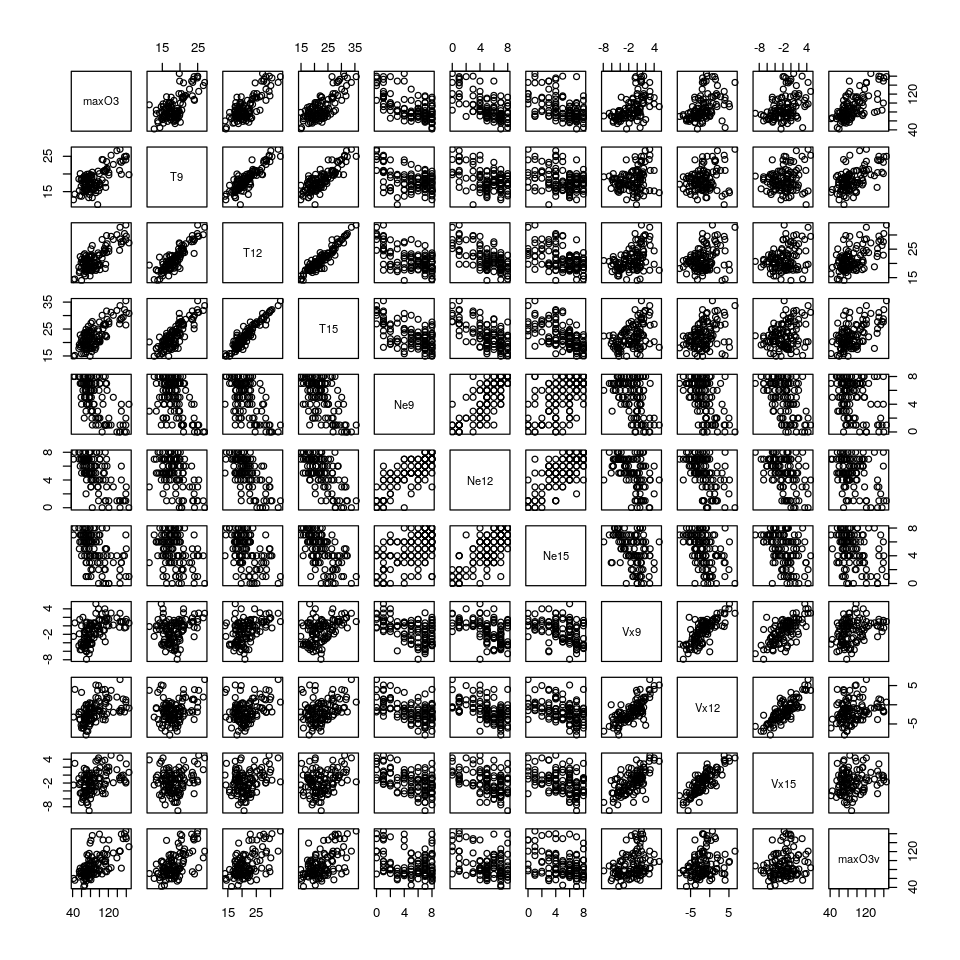

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(ozone[,1:11])

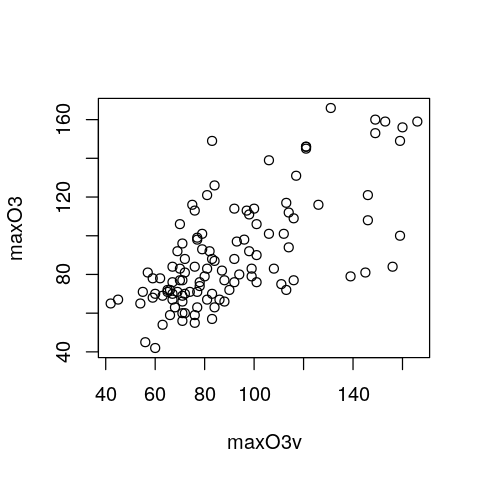

In [26]:
options(repr.plot.width=4, repr.plot.height=4)
plot(maxO3~maxO3v,data=ozone)

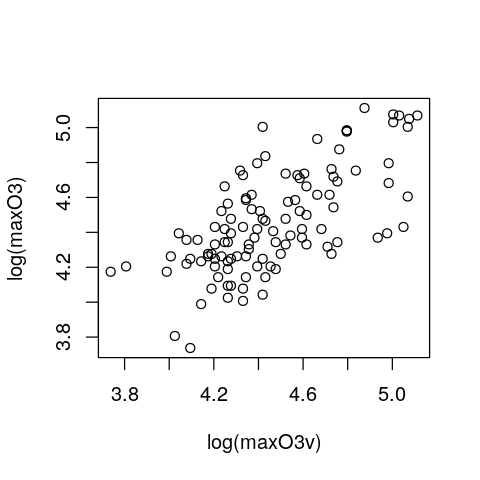

In [27]:
plot(log(maxO3)~log(maxO3v),data=ozone)

Repérer des groupes de variables très corrélées et la liaison entre les variables  principales d'intérêt.

COMMENTAIRE : *Les variables T semblent très corrélées entre elles, les variables T et maxO3 semblent également légèrement corrélées, les variables Ne ne présentent pas de corrélation entre elles, les variables Vx sembles fortement corrélées entre elles.*
Com: Ne9, Ne12, et Ne15 sont corrélées à maxO3v, plus il y a de nuages moins il y a d'ozone. Corrélation faible du vent. MaxO3v et Max03 très corrélées : plus il y a d'ozone la veille, plus il y en a le lendemain (assez logique ^^) (T9,T12,T15 très corréllées entre elles (presque linéaire), Vx9,Vx12, Vx15 aussi) 

#### 2.3.2 Variables qualitatives
calcul de la [table de contingence](http://wikistat.fr/pdf/st-l-des-bi.pdf) et graphe des profils colonnes dans un 'mosaic plot'.

       
        Pluie Sec
  Est       2   8
  Nord     10  21
  Ouest    26  24
  Sud       5  16

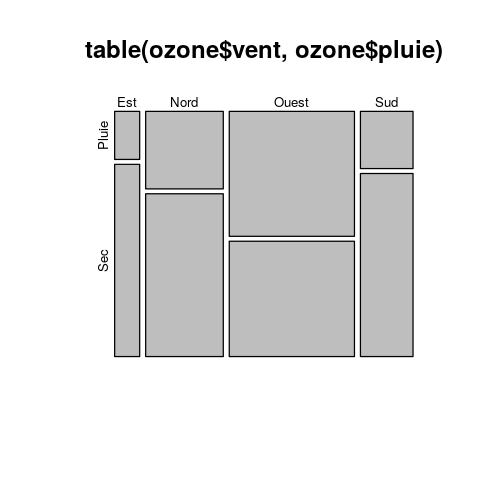

In [28]:
table(ozone$vent,ozone$pluie)
mosaicplot(table(ozone$vent,ozone$pluie))

Commenter la liaison entre ces deux variables.

COMMENTAIRE: *Les vents de Sud et d'Est semblent être liées à un temps sec à 80%, tandis que le vent d'ouest ne semble pas lié à un temps particulier (environ 50-50 pluie/sec). Le vent de nord semble légerement plus lié à un temps sec à 70% environ. L'océan Atlantique est à l'Ouest, la Manche au Nord tandis qu'au sud et à l'est c'est l'intérieur des Terres, ce qui pourrait expliquer cette observation...*
Com: Si on souhaite de la pluie il faut espérer un vent d'ouest. Si on souhaite du temps sec, un vent d'est ou de sud est optimal, à défaut un vent de Nord offre 2/3 chances qu'il fasse sec.


#### 2.3.3 Variables qualitatives et quantitatives
Représenter une possible liaison entre les variables principales et celles qualitatives par des [diagrammes boîte](http://wikistat.fr/pdf/st-l-des-bi.pdf).

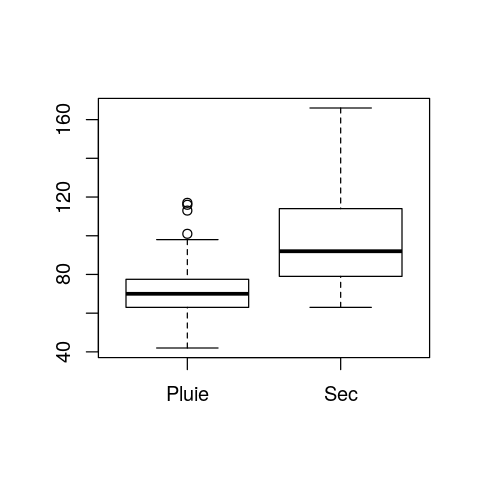

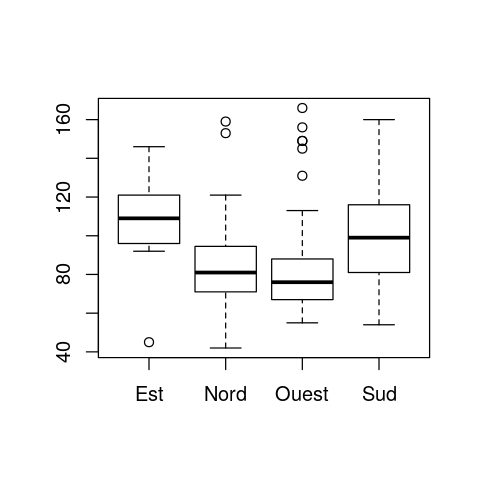

In [29]:
boxplot(maxO3~pluie,data=ozone)
boxplot(maxO3~vent,data=ozone)

Commenter.

COMMENTAIRE : *Quelques valeurs sortent des diagrammes, il pourrait être judicieux de passer les données au log pour avoir une meilleur représentation des données. 
En cas de pluie, plus de 50% des valeurs de maxO3 sont entre 60 et 80, tandis qu'en cas de temps sec plus de 75% des valeurs de maxO3 sont au-dessus de 80.
Il semble que de fortes valeurs de maxO3 soient corrélées avec un vent d'Est, la quasi totalité des valeurs dans ce cas sont au-dessus de 90. De manière générale une forte valeur de maxO3 semble être corrélée avec un vent d'Est ou du Sud (75% des valeurs au-dessus de 80). Néanmoins il semble difficile de différencier un vent d'Ouest ou de Nord avec les valeurs du maxO3 qui sont très similaires. Notons que les valeurs de maxO3 pour le vent de Sud sont très étendues et hormis éventuellement pour les valeurs les plus hautes, il semble difficile de différencier vent d'Ouest, du Nord et du Sud.*

Bien d'autres options permettent de modifier les apparences des graphiques (titres, légendes...). Consulter l'aide en ligne si nécessaire.

## 3 [Tests de comparaison](http://wikistat.fr/pdf/st-l-inf-tests.pdf)
*Important* : Lors de l'exécution de chaque [test](http://wikistat.fr/pdf/st-l-inf-tests.pdf) préciser explicitement :
- la question posée,
- l'hypothèse $H_0$ en relation avec la question et associée au test, 
- la p-valeur calculée et la décision du test, 
- la réponse à la question.


### 3.1 Cas gaussien
Beaucoup des outils ci-dessous nécessitent de vérifier le caractère gaussien ou non de la distribution. En fait, le nombre important d'observations dans l'échantillon permet de s'affranchir de cette hypothèse mais il est utile de savoir la vérifier et éventuellement de sélectionner la transformation la plus appropriée des données notamment pour les variables de concentration d'ozone.

#### 3.1.1 Normalité d'une distribution : Shapiro-Wilks
La [droite de Henri](http://wikistat.fr/pdf/st-l-inf-tests.pdf) ou graphe quantile-quantile  donne déjà un aperçu graphique de la normalité de la distribution avant de calculer le test.

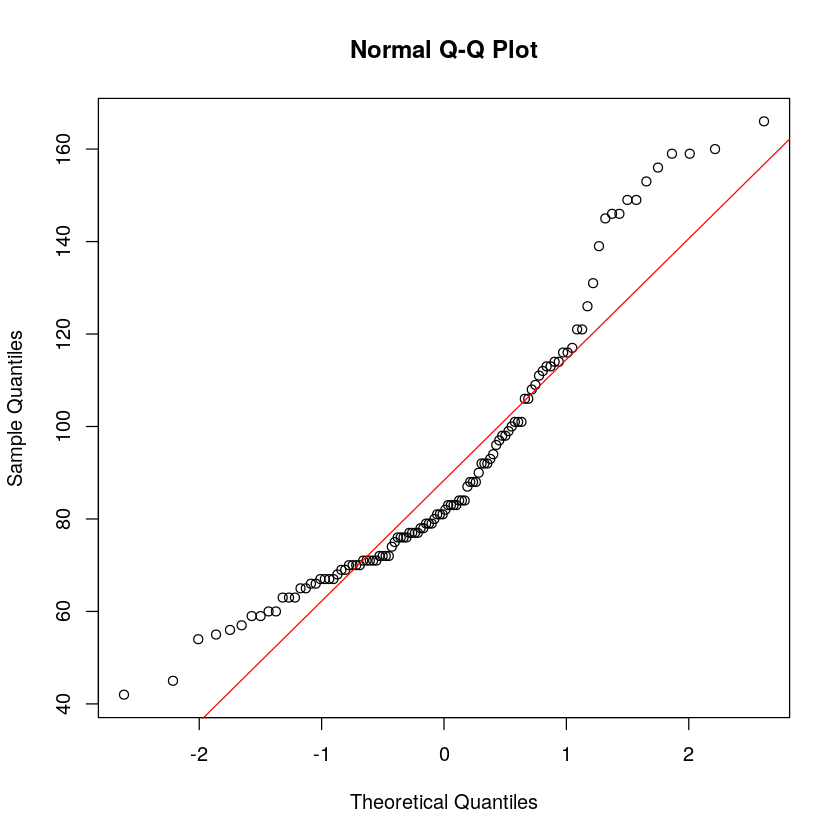

In [40]:
# qq-plots
qqnorm(ozone$maxO3)
qqline(ozone$maxO3,col=2)

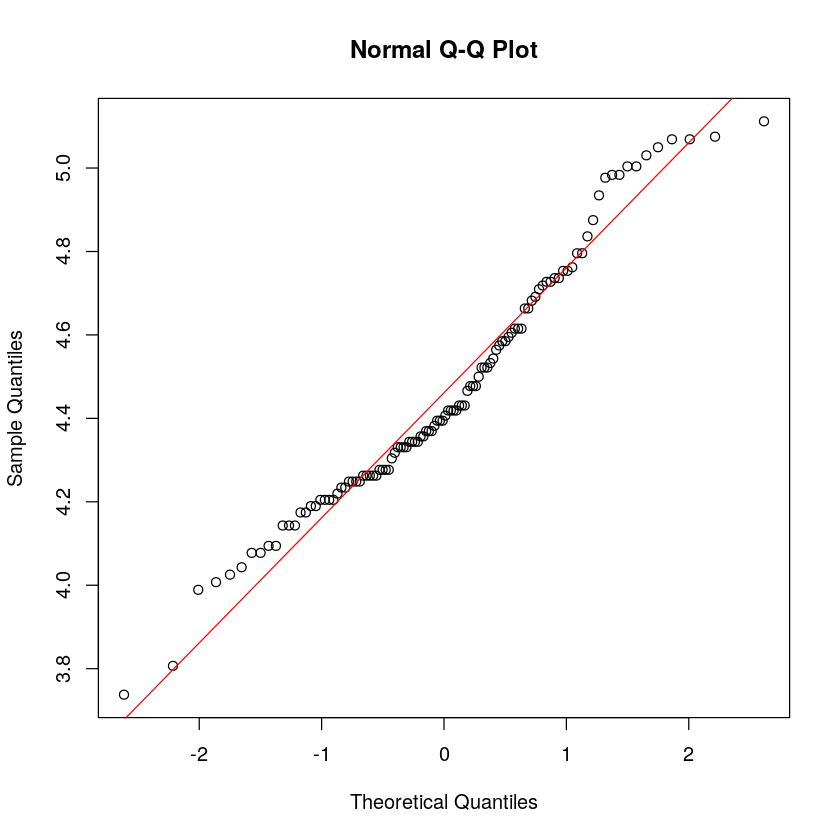

In [8]:
qqnorm(log(ozone$maxO3))
qqline(log(ozone$maxO3),col=2)

In [9]:
# Test de shapiro-Wilks
shapiro.test(ozone$maxO3)
shapiro.test(log(ozone$maxO3))


	Shapiro-Wilk normality test

data:  ozone$maxO3
W = 0.906, p-value = 8.516e-07



	Shapiro-Wilk normality test

data:  log(ozone$maxO3)
W = 0.9685, p-value = 0.009509


Le [test](http://wikistat.fr/pdf/st-l-inf-tests.pdf) de Kolmogorov-Smirnov de comparaison à une distribution théorique pourrait également être utilisé (`ks.test`).

Les variables transformées sont ajoutées dans la table.

In [11]:
# Test de Kolmogorov-Smirnov
ks.test(ozone$maxO3,pnorm)
ks.test(log(ozone$maxO3),pnorm)

Warning message in ks.test(ozone$maxO3, pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  ozone$maxO3
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(log(ozone$maxO3), pnorm):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  log(ozone$maxO3)
D = 0.99991, p-value < 2.2e-16
alternative hypothesis: two-sided


COMMENTAIRES : Les p-values sont significatives (i.e. très faibles), ce qui signifie que les variables testées ne suivent pas une loi normale. On notera que l'utilisation du log améliore (augmente) la p-value, ce qui augmente le caractère gaussien de la distribution.

Les variables transformées sont ajoutées dans la table.

In [12]:
ozone=data.frame(ozone,LmaxO3=log(ozone$maxO3),LmaxO3v=log(ozone$maxO3v))
summary(ozone)

     maxO3              T9             T12             T15       
 Min.   : 42.00   Min.   :11.30   Min.   :14.00   Min.   :14.90  
 1st Qu.: 70.75   1st Qu.:16.20   1st Qu.:18.60   1st Qu.:19.27  
 Median : 81.50   Median :17.80   Median :20.55   Median :22.05  
 Mean   : 90.30   Mean   :18.36   Mean   :21.53   Mean   :22.63  
 3rd Qu.:106.00   3rd Qu.:19.93   3rd Qu.:23.55   3rd Qu.:25.40  
 Max.   :166.00   Max.   :27.00   Max.   :33.50   Max.   :35.50  
      Ne9             Ne12            Ne15           Vx9         
 Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :-7.8785  
 1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.00   1st Qu.:-3.2765  
 Median :6.000   Median :5.000   Median :5.00   Median :-0.8660  
 Mean   :4.929   Mean   :5.018   Mean   :4.83   Mean   :-1.2143  
 3rd Qu.:7.000   3rd Qu.:7.000   3rd Qu.:7.00   3rd Qu.: 0.6946  
 Max.   :8.000   Max.   :8.000   Max.   :8.00   Max.   : 5.1962  
      Vx12             Vx15            maxO3v          vent      pluie   
 M

#### 3.1.2 Intervalle de confiance d'une moyenne : Student
Il est important de savoir estimer l'[intervalle de confiance](http://wikistat.fr/pdf/st-l-inf-estim.pdf) d'une moyenne ; celui-ci permet de tester l'égalité de cette moyenne à une valeur théorique selon l'appartenance ou non de cette valeur à l'intervalle. L'effectif étant suffisamment grand, il n'est pas nécessaire de supposer la normalité des données mais la variable transformée la plus "gaussienne" est choisie. L'intervalle de confiance est calculé par défaut avec un seuil à 95% mais ce paramètre peut être précisé (`conf.level=.95`) de même que la moyenne théorique testée (`mu=0.0`, par défaut à 0).

In [14]:
t.test(ozone$LmaxO3, conf.level=.95)


	One Sample t-test

data:  ozone$LmaxO3
t = 161, df = 111, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.404272 4.514039
sample estimates:
mean of x 
 4.459155 


COMMENTAIRE : Il est clair d'après la p-value que la moyenne n'est pas 0, la moyenne obtenue est 4.459 avec un intervalle de confiance à 95% de [4.404 - 4.514]. A noter que ces valeurs sont des log des valeurs de maxO3 initiales.

#### 3.1.3 Comparaison de deux variances : Fisher
On s'intéresse à l'influence de la présence de pluie sur la concentration en ozone. [Tester](http://wikistat.fr/pdf/st-l-inf-tests.pdf) l'égalité des deux moyennes nécessite de vérifier péralablement plusieurs points:
- la normalité des distributions dans chaque classe à moins que l'échantillon soit considéré de taille suffisamment grande, 
- le caractère indépendant ou appariés des échantillons, 
- l'égalité ou non des variances à l'intérieure de chaque groupe.
On dispose de deux échantillons *indépendants*: les jours de pluie et les jours de temps sec. Testons les autres hypothèses.

In [15]:
# Normalité des distributions (facultatif)
shapiro.test(ozone[ozone$pluie=="Pluie","LmaxO3"])


	Shapiro-Wilk normality test

data:  ozone[ozone$pluie == "Pluie", "LmaxO3"]
W = 0.96768, p-value = 0.2625


In [30]:
shapiro.test(ozone[ozone$pluie=="Sec","LmaxO3"])


	Shapiro-Wilk normality test

data:  ozone[ozone$pluie == "Sec", "LmaxO3"]
W = 0.94131, p-value = 0.002842


In [31]:
# égalité des variances (test de Fisher)
var.test(LmaxO3~pluie,data=ozone)


	F test to compare two variances

data:  LmaxO3 by pluie
F = 0.69867, num df = 42, denom df = 68, p-value = 0.2138
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4103481 1.2333465
sample estimates:
ratio of variances 
         0.6986744 


COMMENTAIRES : Le premier test de Shapiro donne une p-value élevé pour les jours de pluie, ainsi la distribution est bien normale, néanmoins le second test sur les jours sec donne une p-value trop faible pour considérer que la distribution est normale. On s'affranchit néanmoins de l'hypothèse de normalité car les échantillons sont considérés comme étant de taille suffisamment grande.
Le test de Fisher indique que la p-value n'est pas significative, ainsi les deux variances sont considérées comme proches... Néanmoins le ratio des variances est de 0.69, i.e. une des deux variances est 30% plus grande que l'autre...


#### 3.1.4 Comparaison de deux moyennes
Le [test](http://wikistat.fr/pdf/st-l-inf-tests.pdf) de comparaison des moyennes à utiliser (Student *vs.* Welsh) dépend du résultat précédent concernant l'égalité des variances.

##### Echantillons indépendants

Si les variances sont différentes, il s'agit d'un test de Welch.

In [16]:
t.test(LmaxO3~pluie,var.equal=F, data=ozone)


	Welch Two Sample t-test

data:  LmaxO3 by pluie
t = -6.4799, df = 100.8, p-value = 3.411e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3995721 -0.2122638
sample estimates:
mean in group Pluie   mean in group Sec 
           4.270688            4.576606 


Dans le cas où elles sont considérées égales, c'est un test de Student.

In [17]:
t.test(LmaxO3~pluie,var.equal=T, data=ozone)


	Two Sample t-test

data:  LmaxO3 by pluie
t = -6.2161, df = 110, p-value = 9.364e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4034476 -0.2083884
sample estimates:
mean in group Pluie   mean in group Sec 
           4.270688            4.576606 


COMMENTAIRES : Dans les deux cas, le test de comparaison de moyennes indique que les moyennes sont différentes car les p-value sont significatives (<<0.01).

##### Echantillons appariés

On se propose d'étudier la persistance moyenne de la concentration en comparant la moyenne du jour avec celle de la veille. La mesure étant observée au même point à deux instants différents, les échantillons sont cette fois appariés.

In [18]:
t.test(ozone$maxO3, ozone$maxO3v,paired=TRUE)


	Paired t-test

data:  ozone$maxO3 and ozone$maxO3v
t = -0.1264, df = 111, p-value = 0.8996
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.466883  3.931169
sample estimates:
mean of the differences 
             -0.2678571 


COMMENTAIRE : La p-value est grande ici, on considère donc que l'hypothèse nulle est vérifiée et on rejet l'hypothèse alternative. On considère donc que la moyenne en concentration n'a pas variée (ou très peu) entre ces deux jours.

### 3.2 Cas non-paramétrique
Si l'hypothèse de normalité des distributions n'est pas vérifiée et si l'échantillon est trop réduit, c'est un [test](http://wikistat.fr/pdf/st-l-inf-tests.pdf) non-paramétrique qu'il faut mettre en oeuvre. Les tests non-paramétriques sont basés sur les rangs des observations et donc sur les comparaisons des médianes des échantillons. Une transformation des variables par une fonction monotone (*i.e.* $\log$) qui ne changent pas leur ordonnancement  n'a donc pas d'effet sur le calcul d'un test non paramétrique.

#### 3.2.1 Comparaison de deux médianes : Wilcoxon

##### Echantillons indépendants

In [19]:
tapply(ozone$LmaxO3, ozone$pluie, median)
wilcox.test(maxO3 ~ pluie, data=ozone)

Pluie      Sec 
4.248495 4.521789


	Wilcoxon rank sum test with continuity correction

data:  maxO3 by pluie
W = 547.5, p-value = 2.166e-08
alternative hypothesis: true location shift is not equal to 0


##### Echantillons appariés

In [21]:
median(ozone$LmaxO3 - ozone$LmaxO3v)
wilcox.test(ozone$LmaxO3, ozone$LmaxO3v,paired=TRUE)

[1] 0.01030964


	Wilcoxon signed rank test with continuity correction

data:  ozone$LmaxO3 and ozone$LmaxO3v
V = 3126, p-value = 0.9589
alternative hypothesis: true location shift is not equal to 0


Comparer avec les résultats des tests paramétriques.

COMMENTAIRES : Pour les échantillons indépendants on obtient la même conclusion : les deux moyennes sont bien différentes. On peut conclure qu'il y a un lien entre la concentration en O3 et le temps (pluie/sec). On observe qu'un temps sec sera lié à une concentration d'O3 importante tandis qu'un temps pluvieux sera lié à une concentration d'O3 plus faible.
Pour les échantillons appariés on obtient aussi la même conclusion : il n'y a pas eu de variation de concentration d'O3 conséquente entre les deux jours de mesure.

## 4 [Tests de liaison](http://wikistat.fr/pdf/st-l-inf-tests.pdf)
### 4.1 Indépendance de 2 variables qualitatives
Le [test](http://wikistat.fr/pdf/st-l-inf-tests.pdf) du $\chi 2$ est adapté à ce problème.

In [22]:
chisq.test(table(ozone$pluie,ozone$vent))

Warning message in chisq.test(table(ozone$pluie, ozone$vent)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(ozone$pluie, ozone$vent)
X-squared = 7.7258, df = 3, p-value = 0.05203


Remarque : un avertissement peut signaler que les effectifs théoriques (sous hypothèse d'indépendance) de certaines cellules sont trop faibles pour justifier des propriétés asymtotiques du test du $\chi 2$. Il est dans ce cas nécessaire de regrouper des modalités.
### 4.2 Une quantitative et une qualitative
L'[ANOVA](http://wikistat.fr/pdf/st-l-inf-tests.pdf) associée à un test de Fisher adapté à cette situation est sans doute le test le plus utilisé ; il revient au test de Student lorsque la variable qualitative n'a que deux modalités.  L'ANOVA nécessite de vérifier:

- le caractère indépendant des échantillons, 
- la normalité des distributions (ou une taille suffisante d'échantillon) dans chaque classe ou plutôt la normalité des résidus au modèle, 
- l'égalité des variances internes à chaque groupe.

Même si la normalité des résidus est vérifiée \emph{a posteriori}, c'est \emph{a priori} qu'il faut prendre en compte ce résultat pour statuer sur la légitimité du test. 

Si la normalité n'est pas vérifiée pour un petit échantillon ou si l'égalité des variances n'est pas acceptable, un test [non-paramétrique](http://wikistat.fr/pdf/st-l-inf-tests.pdf) (Kruskal-Wallis) doit être envisagé.

#### 4.2.1 Cas gaussien : ANOVA - Fisher
Le test de Bartlett permet de comparer les variances des groupes dans le cas gaussien ou paramétrique.

In [23]:
# test de Bartlett
bartlett.test(LmaxO3 ~ vent, data=ozone)


	Bartlett test of homogeneity of variances

data:  LmaxO3 by vent
Bartlett's K-squared = 0.55238, df = 3, p-value = 0.9072


In [24]:
# ANOVA à un facteur
# estimation des paramètres
res.anova=aov(LmaxO3 ~ vent, data=ozone)


	Shapiro-Wilk normality test

data:  res.anova$residuals
W = 0.9665, p-value = 0.00652


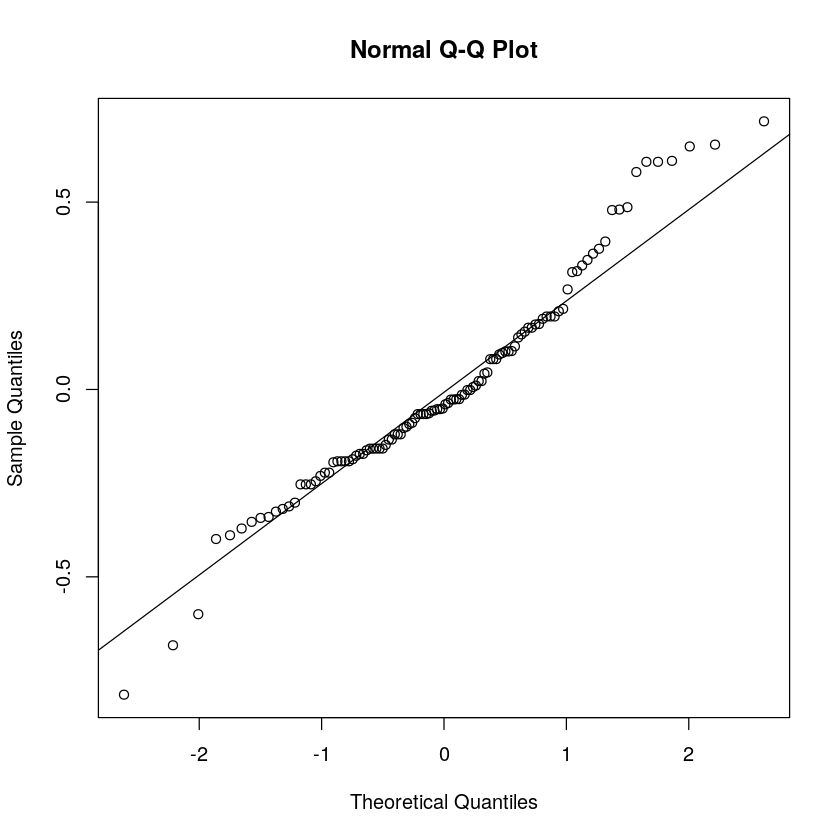

In [25]:
# normalité des résidus au modèle d'ANOVA
qqnorm(res.anova$residuals)
qqline(res.anova$residuals)
shapiro.test(res.anova$residuals)

In [26]:
# Interprétation du test
summary(res.anova)

             Df Sum Sq Mean Sq F value Pr(>F)  
vent          3  0.859 0.28626   3.563 0.0166 *
Residuals   108  8.678 0.08035                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Commenter.

COMMENTAIRES : Le test de Bartlett montre l'égalité des variances au sein de chaque groupe grâce à une p-value élevée.
La normalité des résidus du modèle n'est pas vérifiée par le test de Shapiro qui indique une p-value significative : l'hypothèse nulle de normalité est rejetée, que l'on peut voir graphiquement avec la Q-Q line, les points aux extrêmes ne suivent pas la droite moyenne tracée. Un test non-paramétrique est donc à envisager.

#### 4.2.2 Cas non-paramétrique : Kruskal-Wallis

In [27]:
kruskal.test(maxO3 ~ vent, data=ozone)


	Kruskal-Wallis rank sum test

data:  maxO3 by vent
Kruskal-Wallis chi-squared = 13.645, df = 3, p-value = 0.003431


Comparer les résultats.

COMMENTAIRE : 
La p-value obtenue est significative <0.01, ainsi l'hypothèse nulle est rejetée, c'est à dire que la médiane des différents groupes analysés sont différents, il y a donc un lien entre le maxO3 et le vent, ces deux variables ne sont pas indépendantes.

### 4.3 [Deux variables quantitatives](http://wikistat.fr/pdf/st-l-inf-regsim.pdf)
La [régression simple](http://wikistat.fr/pdf/st-l-inf-regsim.pdf) permet de tester l'influence éventuelle d'une variable sur une autre et plus précisément, dans le cas de cet exemple, d'expliquer et même de prévoir la concentration d'ozone en fonction de celle de la veille.
La commande `lm` produit un ensemble de résultats sous la forme d'une liste de matrices et vecteurs.
#### 4.3.1 Estimation du modèle

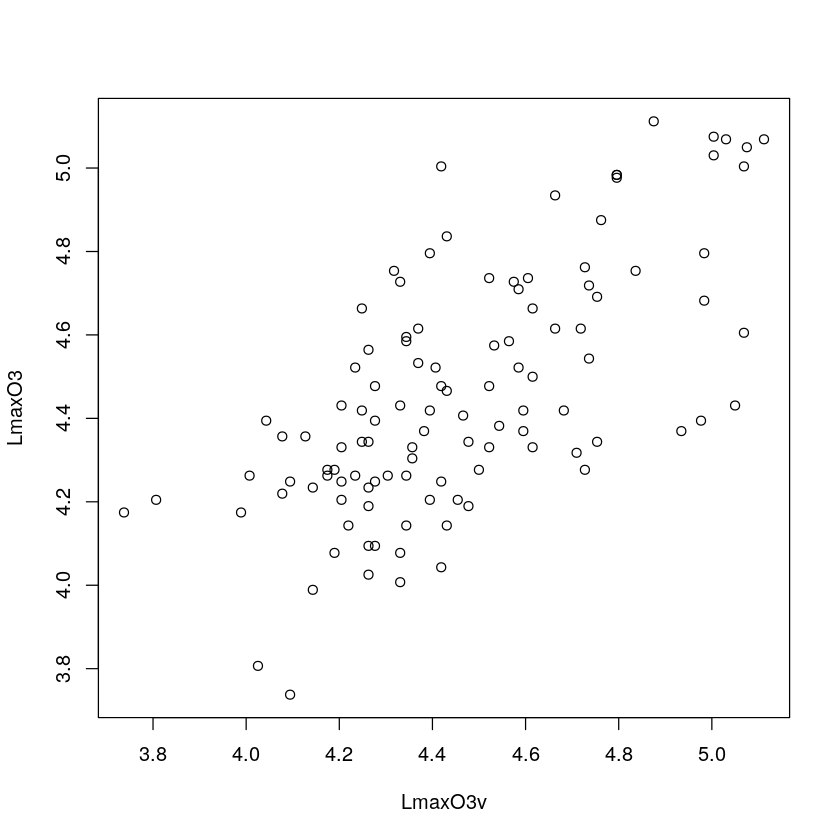

In [28]:
# retracer le nuage de point
plot(LmaxO3 ~ LmaxO3v,data=ozone)

In [30]:
# estimation du modèle
res1.reg=lm(LmaxO3 ~ LmaxO3v, data = ozone)
# liste des résultats
names(res1.reg)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

#### 4.3.2 Diagnostic des résidus
Des graphiques précédents permettent de s'assurer de la \href{http://wikistat.fr/pdf/st-l-inf-regsim.pdf}{validité du modèle} ; statuer sur l'homoscédasticité des résidus, leur normalité, la bonne linéarité du modèle. 


	Shapiro-Wilk normality test

data:  res1.reg$residuals
W = 0.98973, p-value = 0.5622


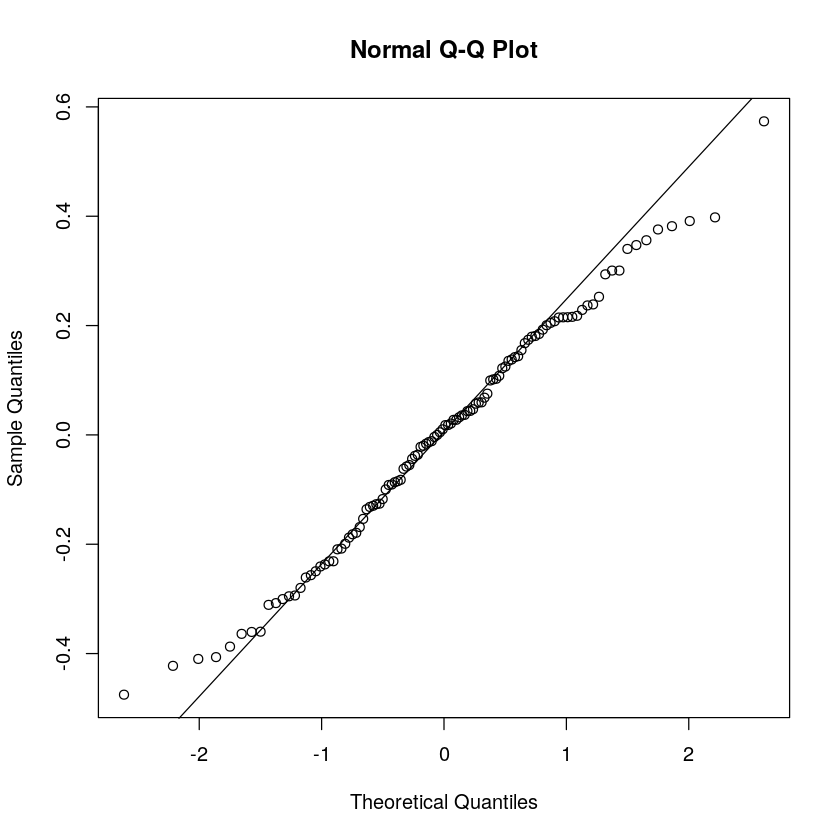

In [31]:
# nuage de point
# normalité des résidus
qqnorm(res1.reg$residuals)
qqline(res1.reg$residuals)
shapiro.test(res1.reg$residuals)

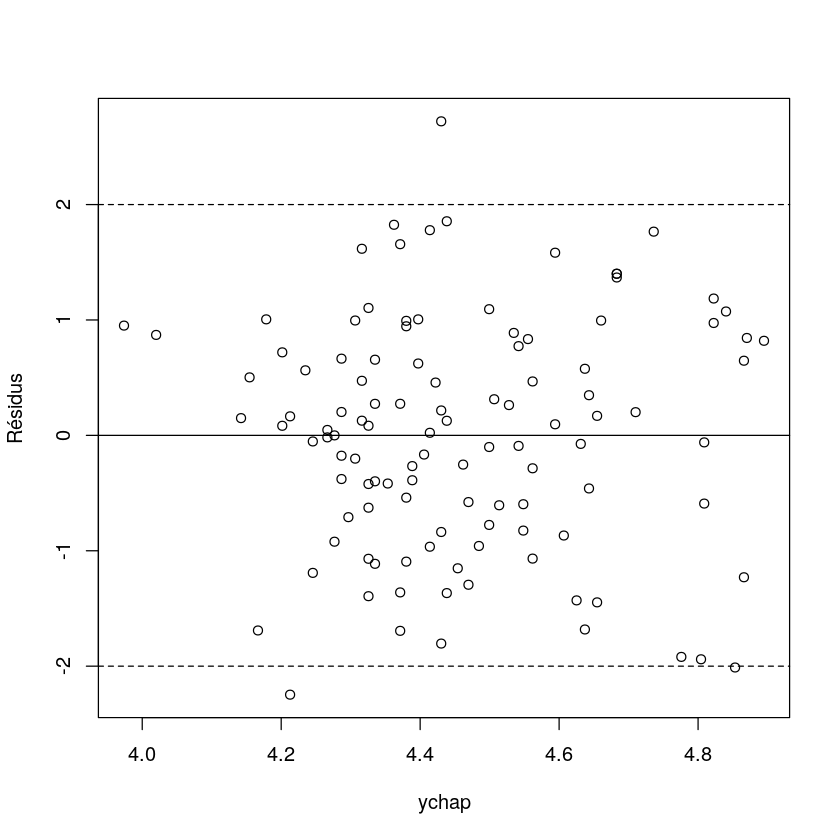

In [35]:
# Repérage d'une structure particulière du nuage
# ou de la présence de "grands" résidus
res.student=rstudent(res1.reg)
ychap=res1.reg$fitted.values
plot(res.student~ychap,ylab="Résidus")
# ajouter des lignes
abline(h=c(-2,0,2),lty=c(2,1,2))

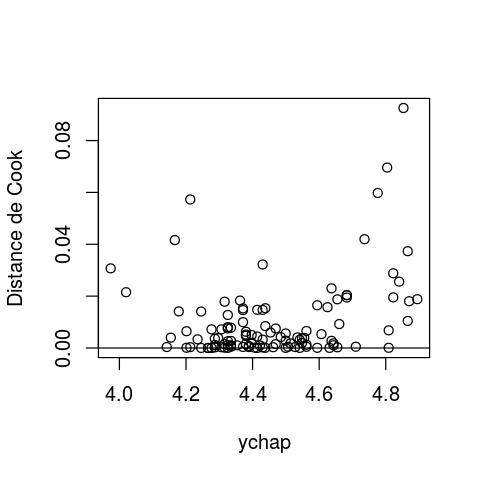

In [47]:
# repérage des points influents
cook=cooks.distance(res1.reg)
plot(cook~ychap,ylab="Distance de Cook")
abline(h=c(0,1),lty=c(1,2))

Les résidus sont "grands" si, une fois normalisés ou plutôt "studentisés", ils sont de valeur absolue plus grande que 2. Une observation est influente si elle a un grand résidu et est associée à une grande valeur sur la diagonale de la *hat matrix*. Cela correspond à une valeur élevée (plus grande que 1) de la distance de Cook.

#### 4.3.3 Significativité du modèle

In [33]:
summary(res1.reg)


Call:
lm(formula = LmaxO3 ~ LmaxO3v, data = ozone)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47515 -0.15732  0.01408  0.16941  0.57364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.46864    0.31421   4.674 8.42e-06 ***
LmaxO3v      0.67024    0.07027   9.538 4.48e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2178 on 110 degrees of freedom
Multiple R-squared:  0.4527,	Adjusted R-squared:  0.4477 
F-statistic: 90.98 on 1 and 110 DF,  p-value: 4.482e-16


Que dire de l'influence de seuil d'ozone de la veille ?  Que dire également de la présence d'observations à effet levier potentiel ? Que dire de la qualité d'ajustement de ce modèle et donc de la qualité attendue de la prévision ?
Interpréter les [tests](http://wikistat.fr/pdf/st-l-inf-regsim.pdf).


COMMENTAIRE : Le test de Shapiro-Wilk a une p-value non significative, les données analysées vérifient l'hypothèse de normalité. Quelques résidus "studentisés" dépassent 2 en valeur absolue, néanmoins ils semblent répartis aléatoirement, l'hypothèse d'homoscédasticité semble vérifiée. Il n'y a pas de point à grand effet de levier car la distance de Cook la plus grande observée est environ 0.09<<1.
Les p-values obtenues pour les coefficients sont significatifs (trois étoiles) ainsi les coefficients de la régression linéaire ne sont pas nuls.
Néanmoins le coefficient de corrélation obtenu est mauvais (0.4), ainsi il n'y a pas de relation linéaire significative entre le seuil d'ozone de la veille et du jour actuel. 

## 5 ACP et régression multiple
### 5.1 [Analyse en composantes principales](http://wikistat.fr/pdf/st-l-des-multi.pdf)
Cette description élémentaire permet de se familiariser avec la structure de corrélation particulière des variables. Il faut sélectionner les seules variables quantitatives et l'\href{http://wikistat.fr/pdf/st-l-des-multi.pdf}{ACP} est réduite.

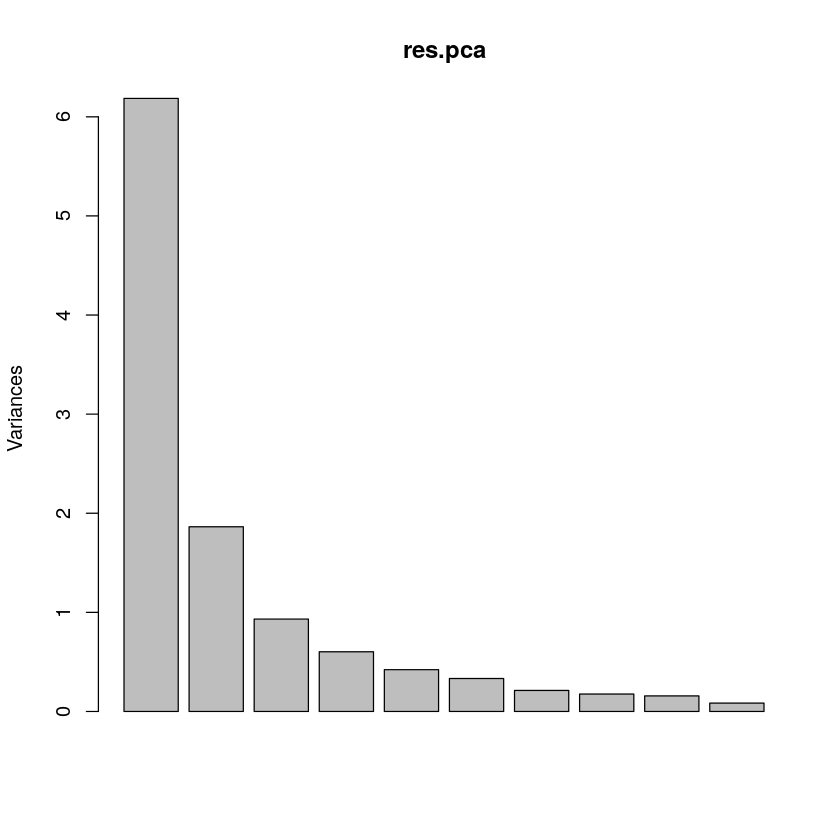

In [36]:
res.pca=prcomp(ozone[,c(2:10,14,15)],scale=T)
# décroissance des valeurs propres
plot(res.pca)

In [50]:
# parts de variance expliquée
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4871 1.3651 0.96554 0.77630 0.64948 0.57666 0.46056
Proportion of Variance 0.5623 0.1694 0.08475 0.05479 0.03835 0.03023 0.01928
Cumulative Proportion  0.5623 0.7318 0.81651 0.87130 0.90964 0.93987 0.95916
                           PC8     PC9    PC10    PC11
Standard deviation     0.41923 0.39649 0.29065 0.17840
Proportion of Variance 0.01598 0.01429 0.00768 0.00289
Cumulative Proportion  0.97514 0.98943 0.99711 1.00000

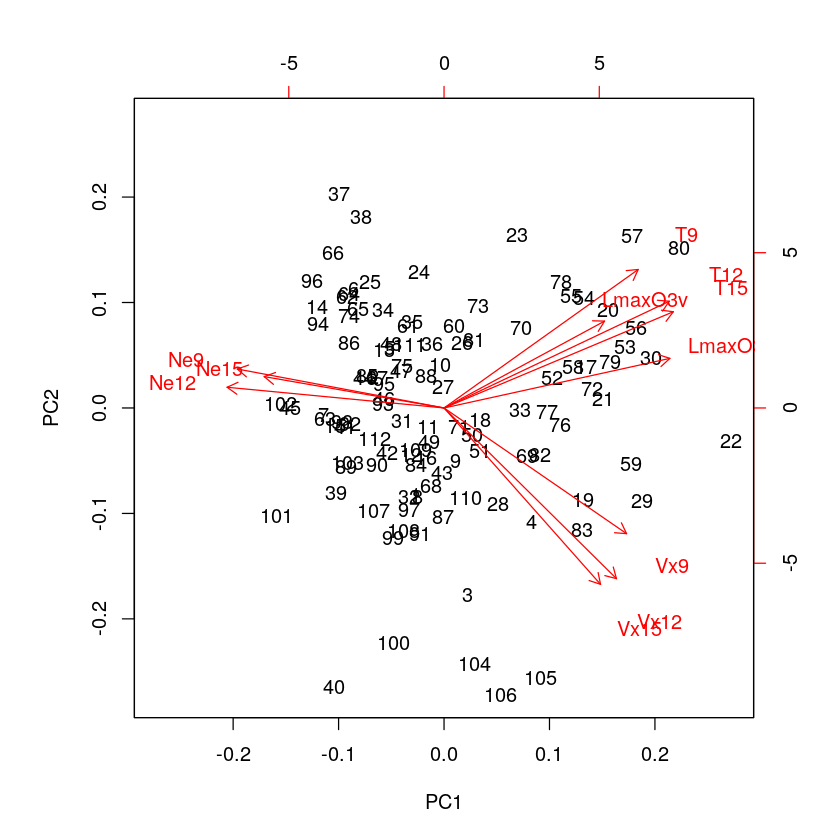

In [37]:
# biplot du premier plan principal
biplot(res.pca)

Comment s'interprètent les axes 1 et 2 ?

COMMENTAIRE :
L'axe 1 (abscisse) représente la composante principale, le vecteur propre le plus représentatif du set de données analysés et l'axe 2 (ordonnée) représente la seconde composante la plus importante après la PC1. Ce graphe permet de projeter l'ensemble de données sur les deux vecteurs propres principaux du set de données.
On remarque d'ailleurs des groupements en fonction de la nature des données : les Vx sont similaires ainsi que les Ne par exemple, car ils possèdent des valeurs de projection sur PC1 et PC2 proches. Ceci permettrait de faire de l'identification de type de données avec une nouvelle colonne de donnée non étiquetée.
Cette méthode permet de réduire la dimensionnalité des données à analyser.

### 5.2 [Régression multiple](http://wikistat.fr/pdf/st-l-inf-intRegmult.pdf)
#### 5.2.1 Modèle linéaire complet
La régression linéaire simple ne conduit pas à un modèle bien ajusté. La [régression linéaire multiple](http://wikistat.fr/pdf/st-l-inf-intRegmult.pdf) ci-dessous, plus complexe, recherche un meilleur ajustement des données.

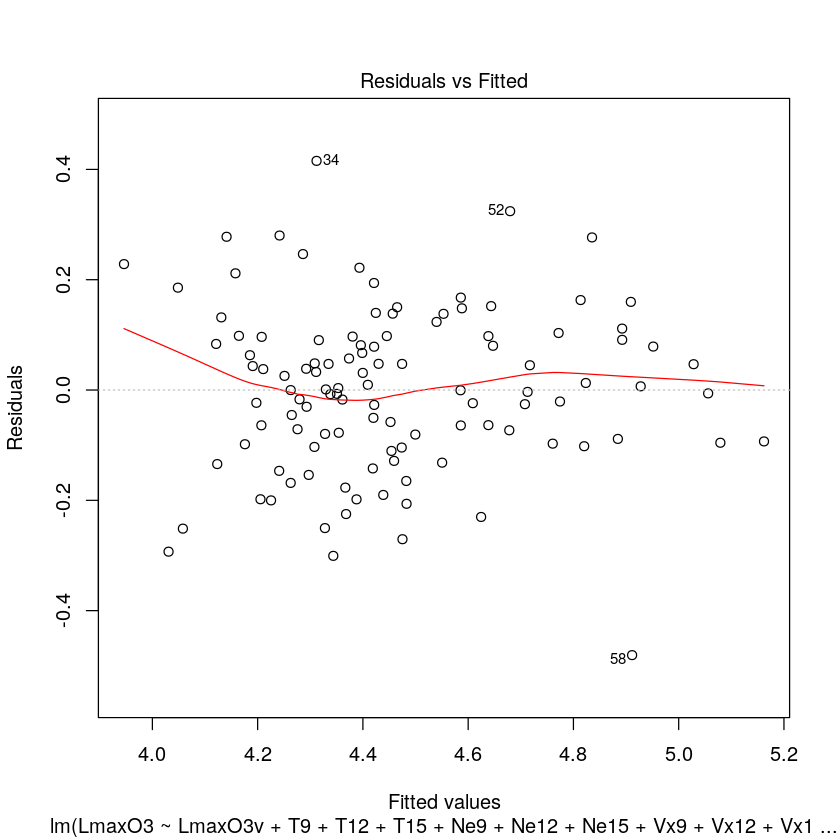

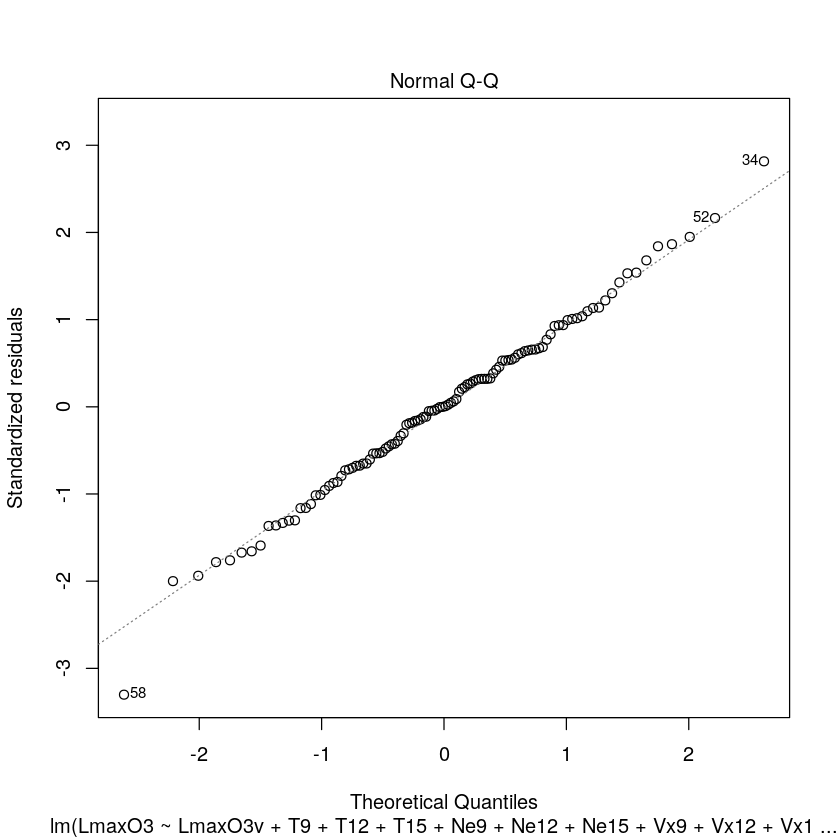

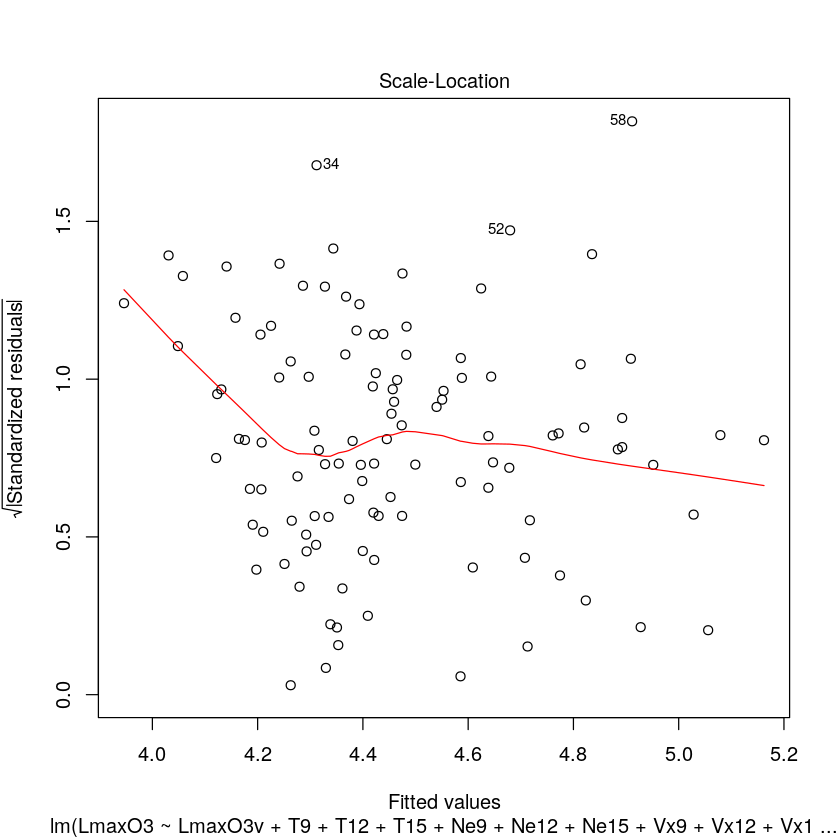

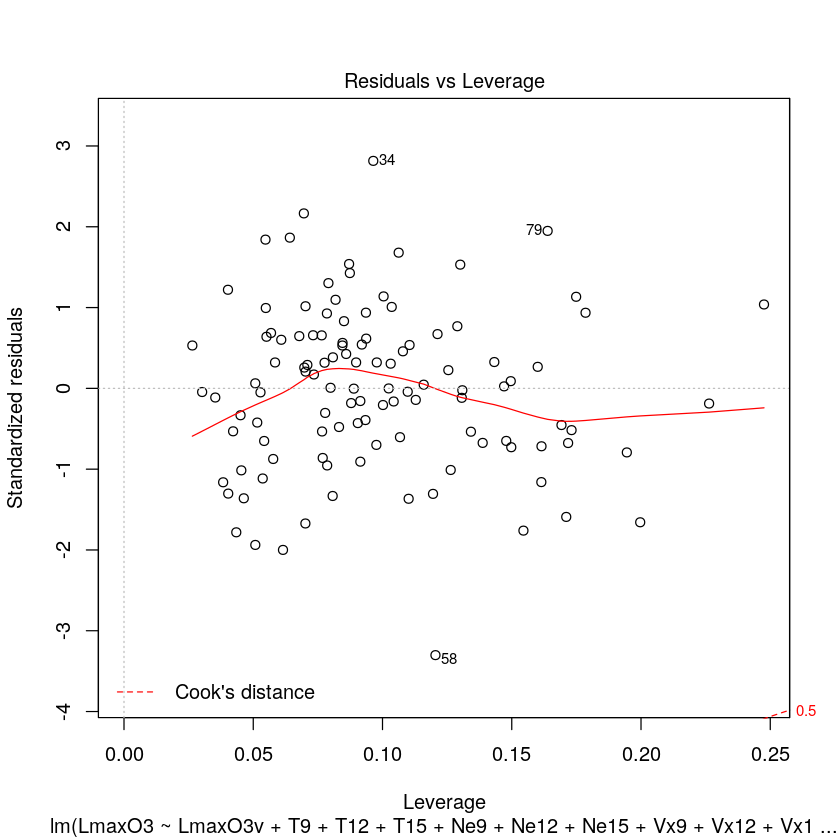

In [38]:
# estimation
res2.reg=lm(LmaxO3 ~ LmaxO3v+T9+T12+T15+Ne9+Ne12+Ne15+Vx9+Vx12+Vx15, data = ozone)
# diagnostics
plot(res2.reg)

In [39]:
# résultats
summary(res2.reg)


Call:
lm(formula = LmaxO3 ~ LmaxO3v + T9 + T12 + T15 + Ne9 + Ne12 + 
    Ne15 + Vx9 + Vx12 + Vx15, data = ozone)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48066 -0.09600  0.00047  0.09650  0.41545 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.4406855  0.2750477   8.874 2.70e-14 ***
LmaxO3v      0.3607895  0.0647189   5.575 2.07e-07 ***
T9          -0.0028593  0.0121877  -0.235   0.8150    
T12          0.0233395  0.0155098   1.505   0.1355    
T15          0.0051470  0.0123747   0.416   0.6783    
Ne9         -0.0259009  0.0101483  -2.552   0.0122 *  
Ne12         0.0006295  0.0147886   0.043   0.9661    
Ne15        -0.0032007  0.0108382  -0.295   0.7684    
Vx9          0.0114765  0.0099289   1.156   0.2505    
Vx12         0.0020700  0.0114051   0.182   0.8563    
Vx15         0.0002917  0.0098968   0.029   0.9765    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1552 on 101 

Commenter les résultats obtenus sur la validité du modèle et la qualité de l'ajustement par rapport au modèle précédent. Que dire à propos de la significativité des tests de Student sur la nullité des paramètres ? Que penser alors de la présence de variables présentant de fortes colinéarités ?

La ligne Q-Q montre que les résidus semblent satisfaire l'hypothèse de normalité, néanmoins certains points peut-être sont aberrants ou possède un grand effet de levier : les points 34, 58 et 52.
Les variables LmaxO3v et Ne9 présentent des p-values significatives et ainsi sont explicatives du Lmax03.


#### 5.2.2 Sous-modèle
Une procédure de sélection de modèle non détaillée (*stepwise*) conduit à considérer le modèle ci-dessous : 

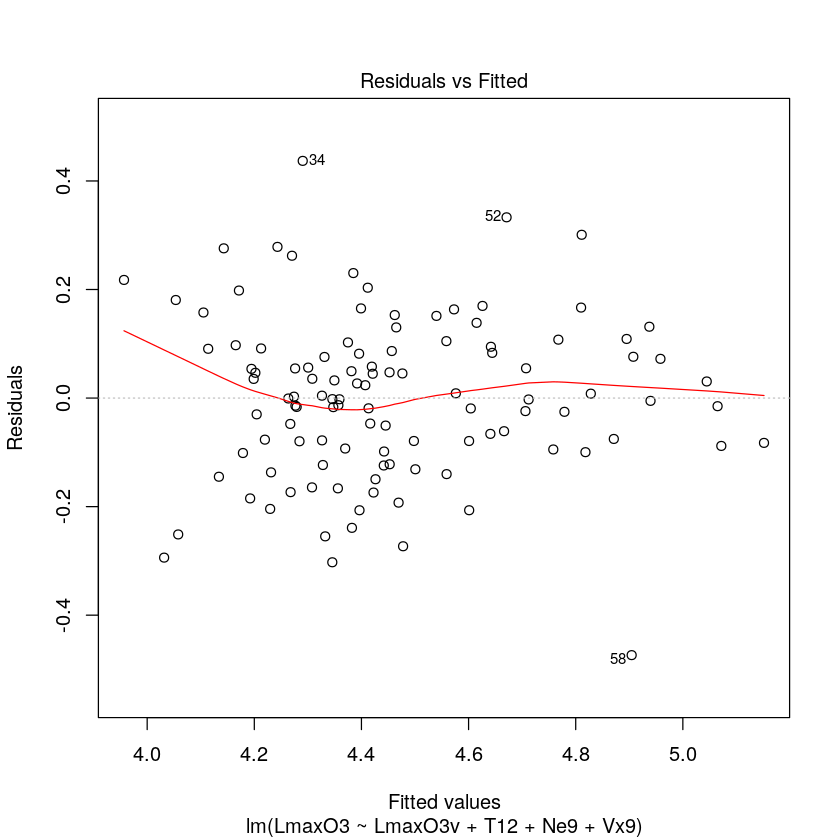

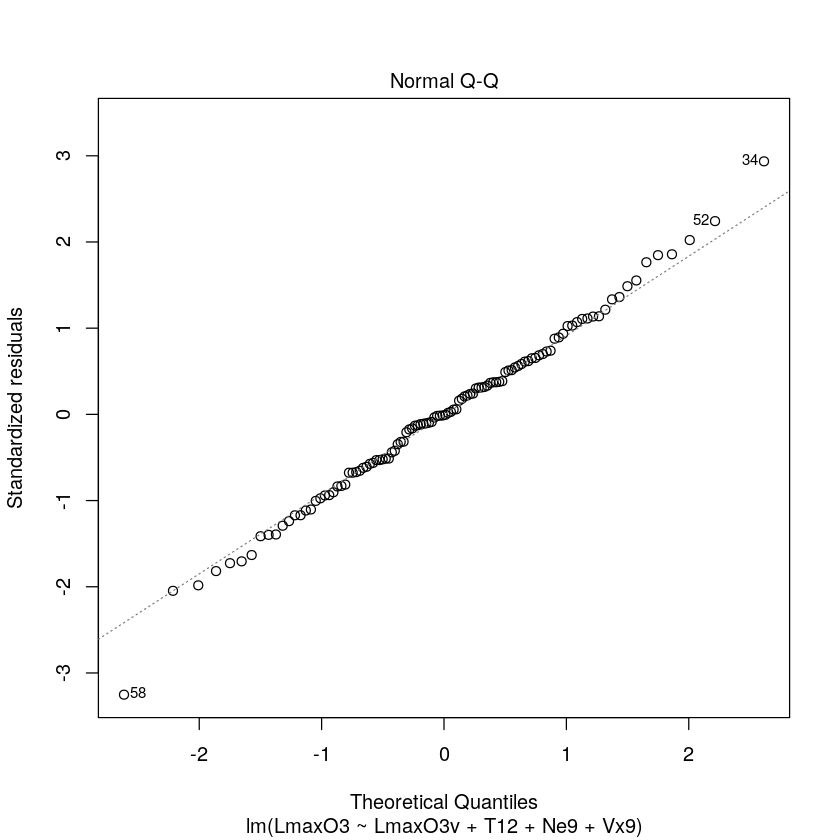

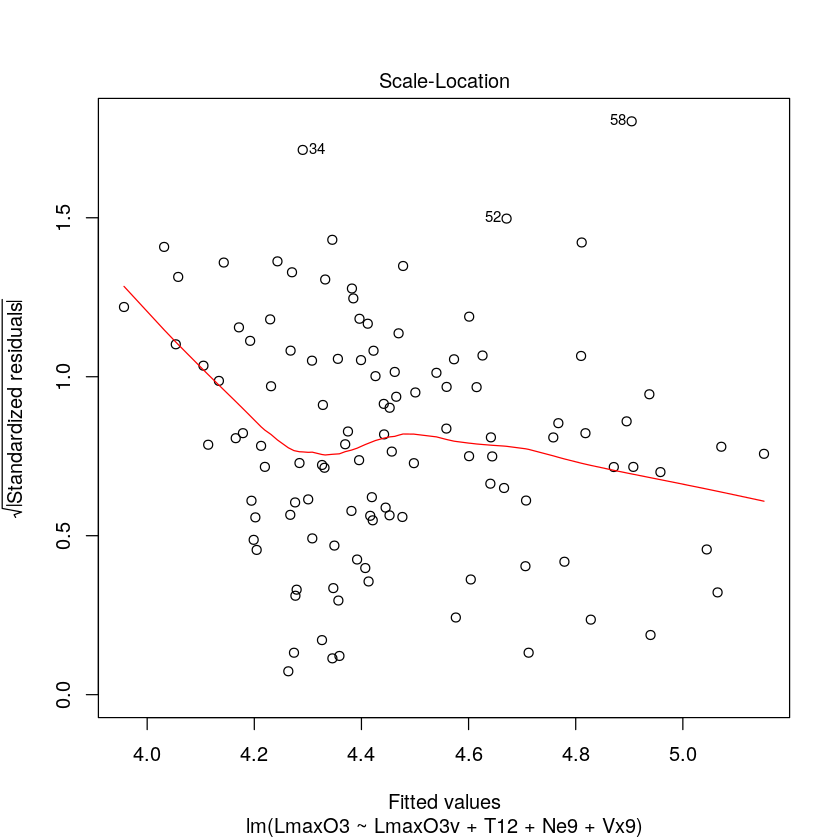

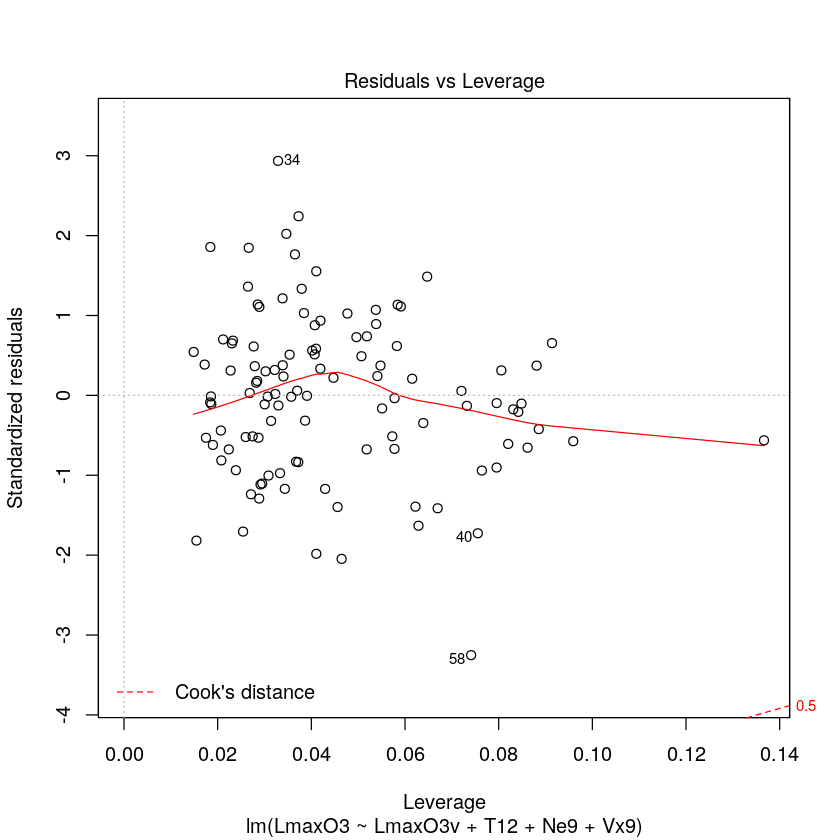

In [41]:
res3.reg=lm(LmaxO3~LmaxO3v+T12+Ne9+Vx9,data=ozone)
# diagnostics
plot(res3.reg)

In [42]:
# résultats
summary(res3.reg)


Call:
lm(formula = LmaxO3 ~ LmaxO3v + T12 + Ne9 + Vx9, data = ozone)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47363 -0.09343 -0.00138  0.09094  0.43700 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.429581   0.242529  10.018  < 2e-16 ***
LmaxO3v      0.361741   0.059451   6.085 1.85e-08 ***
T12          0.026445   0.005049   5.238 8.18e-07 ***
Ne9         -0.027640   0.007312  -3.780 0.000258 ***
Vx9          0.014429   0.006551   2.203 0.029764 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1514 on 107 degrees of freedom
Multiple R-squared:  0.7429,	Adjusted R-squared:  0.7333 
F-statistic: 77.31 on 4 and 107 DF,  p-value: < 2.2e-16


Commenter à nouveau les résultats.

COMMENTAIRES : On a gardé ici que les variables explicatives qui avaient la plus faible p-value, ce qui permet d'enlever l'influence des autres variables qui apportaient du "bruit" dans la régression. On observe en effet des p-value très significatives, plus significatives que lorsque toutes les variables étaient prises en compte. Il y a donc des couplages entre les différentes variables qui ont été supprimés en simpifiant les variables explicatives choisies pour la régression.

#### 5.2.3 Meilleure prévision
L'objectif est de rechercher le meilleur modèle de prévision de la concentration en ozone. Ceux-ci sont comparés en considérant le [PRESS](http://wikistat.fr/pdf/st-l-inf-intRegmult.pdf) (predicted residual sums of squares) ou *leave one out cross validation*. Une fonction élémentaire est définie pour calculer le PRESS dans le cas élémentaire de la régression linéaire.

In [43]:
# définition de la fonction PRESS
press=function(model) {
h=influence(model)$hat
e=influence(model)$wt.res
n=length(e)
sum((e/(1-h))^2)/n
}
# application aux différents modèles
press(res1.reg)
press(res2.reg)
press(res3.reg)

[1] 0.04844712

[1] 0.02682156

[1] 0.02395248

Le meilleur modèle de prévision est-il celui qui ajuste le mieux les données ?

Le coefficient $R^2$ permet de comparer les qualités d’ajustement mais la meilleure prévision n’est pas nécessairement fournie par un modèle de $R^2$ maximum. Le PRESS encore appelé leave one out cross validation (loo CV) est plus pertinent pour atteindre cet objectif. Ici le meilleur modèle est le dernier, le PRESS obtenu est le plus faible. On notera ici que le $R^2$ croit avec les modèle (du numéro 1 à 3) tandis que le PRESS diminue.

## Annexe : analyse de covariance et sélection de variables
Ce scénario se limite volontairement aux outils les plus élémentaires. D'autres modèles seraient à tester, notamment une [analyse de covariance](http://wikistat.fr/pdf/st-m-modlin-anacova.pdf) associant les variables qualitatives au modèle, la présence ou non d'interactions... pour tenter d'améliorer la qualité de prévision. C'est l'objet d'autres scénarios. Pour achever celui-ci dans la logique des outils linéaires mis en \oe uvre, voici la construction du modèle d'[analyse de covariance](http://wikistat.fr/pdf/st-m-modlin-anacova.pdf) avec sélection de variables au sens du critère AIC pour optimiser les qualités de prévision. C'est le même type d'algorithme qui a été exécuté pour recherche le sous-modèle "optimal".

L'algorithme de sélection descendante débute par l'estimation du modèle complet. Les interactions ne sont pas prises en compte; celles avec la pluie ne change rien, elles sont éliminées systématiquement par l'algorithme.

Start:  AIC=-82.95
LmaxO3 ~ T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Vx9 + Vx12 + Vx15 + 
    vent + pluie + LmaxO3v

          Df Deviance     AIC
- vent     3   2.3816 -87.438
- Ne12     1   2.3496 -84.953
- T9       1   2.3515 -84.865
- T15      1   2.3540 -84.744
- Vx12     1   2.3542 -84.735
- Ne15     1   2.3546 -84.717
- Vx15     1   2.3547 -84.713
- Vx9      1   2.3547 -84.711
- T12      1   2.3881 -83.136
<none>         2.3496 -82.953
- pluie    1   2.4114 -82.045
- Ne9      1   2.4902 -78.444
- LmaxO3v  1   2.9731 -58.593

Step:  AIC=-87.44
LmaxO3 ~ T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Vx9 + Vx12 + Vx15 + 
    pluie + LmaxO3v

          Df Deviance     AIC
- Ne12     1   2.3821 -89.418
- Vx12     1   2.3821 -89.414
- Ne15     1   2.3830 -89.371
- Vx15     1   2.3831 -89.367
- T9       1   2.3846 -89.297
- T15      1   2.3895 -89.069
- Vx9      1   2.3957 -88.778
<none>         2.3816 -87.438
- T12      1   2.4285 -87.253
- pluie    1   2.4335 -87.022
- Ne9      1   2.5248 -82.900

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,111,9.536849,NA,NA
T12,1,5.5118268,110,4.025022,242.69504,3.604133e-29
Ne9,1,0.4461249,109,3.578897,19.64363,2.282773e-05
Vx9,1,0.2790454,108,3.299852,12.28684,6.698192e-04
pluie,1,0.1350416,107,3.164810,5.94611,1.641168e-02
LmaxO3v,1,0.7574533,106,2.407357,33.35195,7.762643e-08


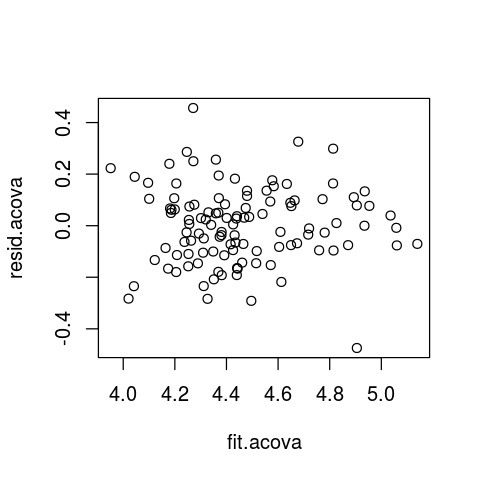

In [57]:
res.acova=glm(LmaxO3 ~ T9+T12+T15+Ne9+Ne12+Ne15+Vx9+Vx12+Vx15+vent+pluie+LmaxO3v,data=ozone)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
res.acova.step=step(res.acova,direction="backward")
# paramètres retenus
anova(res.acova.step,test="F")
# Extraction des valeurs ajustées et des résidus
fit.acova=res.acova.step$fitted.values
resid.acova=res.acova.step$residuals
# Graphe des résidus
plot(fit.acova,resid.acova)

In [58]:
summary(res.acova.step)


Call:
glm(formula = LmaxO3 ~ T12 + Ne9 + Vx9 + pluie + LmaxO3v, data = ozone)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.47442  -0.09576   0.00404   0.08994   0.45643  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.477832   0.243927  10.158  < 2e-16 ***
T12          0.025451   0.005077   5.013 2.16e-06 ***
Ne9         -0.026416   0.007332  -3.603 0.000481 ***
Vx9          0.012443   0.006675   1.864 0.065083 .  
pluieSec     0.048523   0.034779   1.395 0.165879    
LmaxO3v      0.347132   0.060108   5.775 7.76e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.02271092)

    Null deviance: 9.5368  on 111  degrees of freedom
Residual deviance: 2.4074  on 106  degrees of freedom
AIC: -98.234

Number of Fisher Scoring iterations: 2


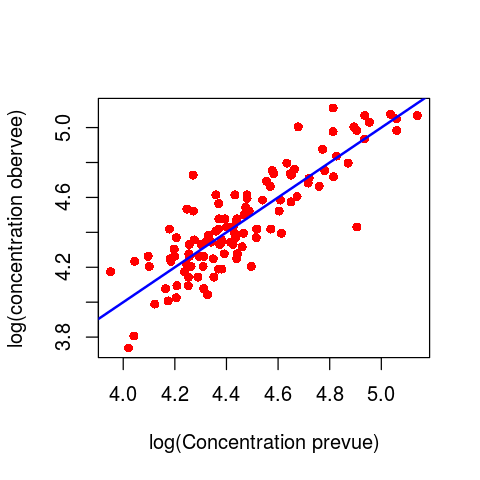

In [59]:
plot(fit.acova,ozone$LmaxO3,pch=16,col="red",,xlab="log(Concentration prevue)",ylab="log(concentration obervee)")
abline(0,1,col="blue", lwd=2)

Ces résultats montrent que l'occurence de pluie est bien à prendre en compte dans le modèle. Ce modèle est comparé avec le précédent en calculant une estimation de l'erreur de prévision par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf).

In [60]:
library(boot) # chargement de la bibliothèque
# validation croisée  10-plis
# meilleur modèle linéaire 
res3.reg=glm(LmaxO3~LmaxO3v+T12+Ne9+Vx9,data=ozone)
res4.reg=glm(LmaxO3~LmaxO3v+T12+Ne9+Vx9+pluie,
   data=ozone)
set.seed(111)
cv.glm(ozone, res3.reg, K=10)$delta[1] 
set.seed(111)
# modèle d'analyse de covariance
cv.glm(ozone, res.acova.step, K=10)$delta[1] 

[1] 0.02396166

[1] 0.02385579

Même si la variable pluie est significative dans le modèle, l"amélioration" de la qualité de prévision n'est pas franchement significative.